In [1]:
import numpy as np
from pylab import plt
from utils import Timer
import utils.plt
import pylab
pylab.ion()
def f(y,x,nRows,nCols):
    x0 = nCols/2
    y0 = nRows/2
    return (x-x0)**2+(y-y0)**2
# define image size:
nRows=3000
nCols=4000

### Suppose (x,y) stands for pixel locations, and we want to evaluate f on all pixels

In [2]:
# Here is the bad way to do it in Python
z1=np.zeros((nRows,nCols))
timer1=Timer()
timer1.tic()
for row in range(nRows):
    for col in range(nCols):
        z1[row,col]=f(y=row,x=col,nRows=nRows,nCols=nCols)

timer1.toc()
print(timer1)

Timer: secs = 8.10063886642


In [3]:
yy,xx=np.mgrid[0:nRows,0:nCols]
print('xx:')
print(xx)
print('yy:')
print(yy)

xx:
[[   0    1    2 ..., 3997 3998 3999]
 [   0    1    2 ..., 3997 3998 3999]
 [   0    1    2 ..., 3997 3998 3999]
 ..., 
 [   0    1    2 ..., 3997 3998 3999]
 [   0    1    2 ..., 3997 3998 3999]
 [   0    1    2 ..., 3997 3998 3999]]
yy:
[[   0    0    0 ...,    0    0    0]
 [   1    1    1 ...,    1    1    1]
 [   2    2    2 ...,    2    2    2]
 ..., 
 [2997 2997 2997 ..., 2997 2997 2997]
 [2998 2998 2998 ..., 2998 2998 2998]
 [2999 2999 2999 ..., 2999 2999 2999]]


In [4]:
z2=np.zeros((nRows,nCols))
timer2=Timer()
timer2.tic()
z2[:]=f(x=xx,y=yy,nRows=nRows,nCols=nCols)
# or even just:
#z2=f(x=xx,y=yy,nRows=nRows,nCols=nCols)
timer2.toc()
print(timer2)
print('speedup: ',timer1.secs/timer2.secs)
print(np.allclose(z1,z2))

Timer: secs = 0.222410917282
speedup:  36.4219480114
True


In [5]:
timer3=Timer()
timer3.tic()
z3=np.fromfunction(f,shape=[nRows,nCols],nRows=nRows,nCols=nCols)
timer3.toc()
print('speedup: ',timer1.secs/timer3.secs)
print(np.allclose(z1,z3))

speedup:  30.5119141484
True


In [6]:
pts = np.vstack([xx.ravel(),yy.ravel()]).T
print(pts.shape)
print('pts:')
print(pts)

(12000000, 2)
pts:
[[   0    0]
 [   1    0]
 [   2    0]
 ..., 
 [3997 2999]
 [3998 2999]
 [3999 2999]]


In [7]:
theta = np.deg2rad(30) # degrees to radians 
c=np.cos(theta)
s=np.sin(theta)
yy_new = c*xx-s*yy
xx_new = s*xx+c*yy

sl = slice(None,None,100)
# so xx[sl,sl] will be the same as xx[::100,::100] or the even more verbose xx[0:xx.shape[0]:100,0:xx.shape[1]:100]

(0.0, 4500.0, -2000.0, 4000.0)

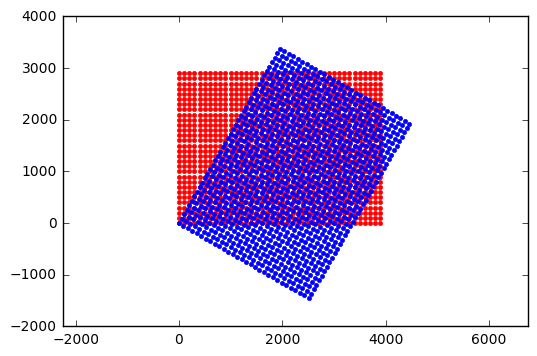

In [8]:
plt.plot(xx[sl,sl].ravel(),yy[sl,sl].ravel(),'r.')
plt.plot(xx_new[sl,sl].ravel(),yy_new[sl,sl].ravel(),'b.')
plt.axis('equal')



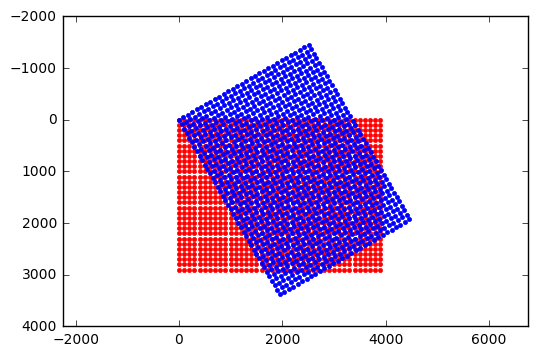

In [9]:
plt.plot(xx[sl,sl].ravel(),yy[sl,sl].ravel(),'r.')
plt.plot(xx_new[sl,sl].ravel(),yy_new[sl,sl].ravel(),'b.')
plt.axis('equal')
utils.plt.axis_ij()

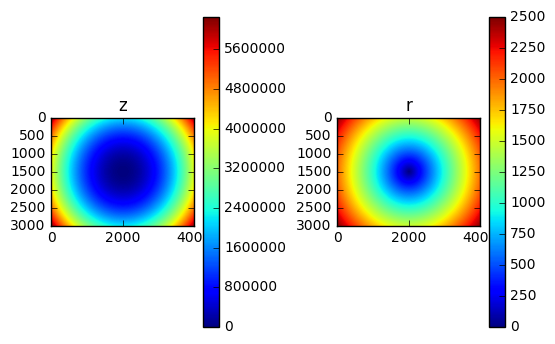

In [10]:
r=np.sqrt(z2)
plt.figure()
plt.subplot(121)
plt.imshow(z2)
plt.colorbar()
plt.set_cmap('jet')
plt.title('z')
plt.xticks([0,nCols/2,nCols])
plt.subplot(122)
plt.imshow(r)
plt.colorbar()
plt.set_cmap('jet')
plt.title('r')
plt.xticks([0,nCols/2,nCols])
plt.subplots_adjust(wspace=0.6)

In [11]:

q = (r-r.min())/r.max()
labels = np.round(q*4).astype(np.int)
print(np.unique(labels))

[0 1 2 3 4]


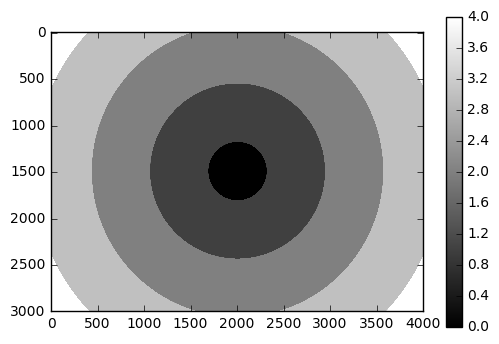

In [12]:
plt.imshow(labels)
plt.colorbar()
plt.set_cmap('gray')

In [13]:
palette = np.array( [ [0,0,0],              # black
                    [255,0,0],              # red
                    [0,255,0],              # green
                    [0,0,255],              # blue
                    [255,255,255]           # white
                    ] )
print(palette.shape)
print(labels.shape)

(5, 3)
(3000, 4000)


In [14]:
img = palette[labels]
print(img.shape)

(3000, 4000, 3)


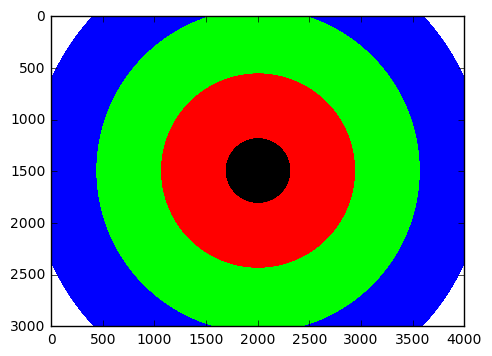

In [15]:
plt.imshow(img.astype(np.uint8))


In [16]:
(np.arange(0,nCols,500))

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500])